In [ ]:
!pip install torch
!pip install pytorch-pretrained-bert pytorch-nlp
!pip install torchviz

     |████████████████████████████████| 133kB 5.5MB/s 
     |████████████████████████████████| 92kB 8.2MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 6.7MB 14.8MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
  Created wheel for boto3: filename=boto3-1.16.13-py2.py3-none-any.whl size=128453 sha256=7105c0b2f8d082f841d9d69f6aca6d282e3da90abbd3acf718acc590ec3db4ae
  Stored in directory: /root/.cache/pip/wheels/bd/ca/cc/d99cff66806b87034af25f8fd8b0adb3e0151b17eea7891143
Successfully built boto3
ERROR: botocore 1.19.13 has requirement urllib3<1.26,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
     |████████████████████████████████| 51kB 3.4MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=690cea4575e041ea39834ac58e48a6d4c92e9f147219933aca160e07bf90d46e
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf

In [ ]:
import torch
import torch.optim as optim
import torchviz
from torchviz import make_dot
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
x = np.random.rand(100)
y = np.random.rand(100)

In [ ]:
np.corrcoef(x,y)

array([[1.        , 0.01714401],
       [0.01714401, 1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25, shuffle=True)

In [ ]:
x_train_tensor = torch.from_numpy(train_x).to(device)
y_train_tensor = torch.from_numpy(train_y).to(device)

In [ ]:
print(type(train_x), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.DoubleTensor


In [ ]:
x_train_cpu = x_train_tensor.cpu().numpy()

In [ ]:
type(x_train_cpu)

numpy.ndarray

In [ ]:
a = torch.randn(1, requires_grad=True).to(device)
b = torch.randn(1, requires_grad=True).to(device)

In [ ]:
a

tensor([-0.1339], device='cuda:0', grad_fn=<CopyBackwards>)

In [ ]:
b

tensor([0.1420], device='cuda:0', grad_fn=<CopyBackwards>)

In [ ]:
a = torch.randn(1).to(device)
b = torch.randn(1).to(device)

In [ ]:
a,b

(tensor([-0.4770], device='cuda:0'), tensor([0.3052], device='cuda:0'))

In [ ]:
a.requires_grad_()
b.requires_grad_()

tensor([0.3052], device='cuda:0', requires_grad=True)

In [ ]:
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([1.7078], device='cuda:0', requires_grad=True) tensor([1.2329], device='cuda:0', requires_grad=True)


In [ ]:
yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

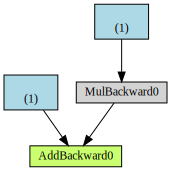

In [ ]:
make_dot(yhat)

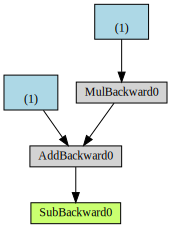

In [ ]:
make_dot(error)

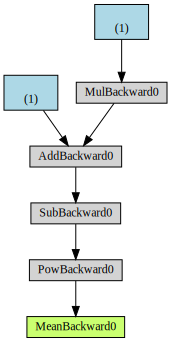

In [ ]:
make_dot(loss)

In [ ]:
make_dot(a)

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader

In [ ]:
train = datasets.MNIST('',train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
batch_size=32
trainset = DataLoader(train, batch_size=batch_size, shuffle=True)
testset = DataLoader(test, batch_size=batch_size, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

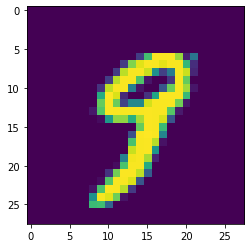

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))

In [ ]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for i in trainset:
  xs, ys = i
  for y in ys:
    counter_dict[int(y)] += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.softmax(self.fc4(x), dim=1)
    return x



net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
x = torch.rand((28,28))
x = x.view((-1, 28*28))

In [ ]:
output = net(x)

In [ ]:
output

tensor([[0.1036, 0.1078, 0.1032, 0.0888, 0.0912, 0.1080, 0.1124, 0.1027, 0.0847,
         0.0975]], grad_fn=<SoftmaxBackward>)

In [ ]:
import torch.optim as optim 
optimizer = optim.Adam(net.parameters(), lr=0.001)
epochs = 3
for epoch in range(epochs):
  for data in trainset:
    features, labels = data
    net.zero_grad()
    output = net(features.view((-1, 28*28)))
    loss = F.nll_loss(output, labels)
    loss.backward()
    optimizer.step()

  print('LOSS : ', loss)



LOSS :  tensor(-0.8435, grad_fn=<NllLossBackward>)
LOSS :  tensor(-0.9474, grad_fn=<NllLossBackward>)
LOSS :  tensor(-0.9552, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    x, y = data
    output = net(x.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print('ACCURACY : ', float(correct/total))

ACCURACY :  0.9533
